In [1]:
from mllib.ensemble import RandomSeedAveragingRegressor
from mllib.model_selection import TPESearchCV
from mllib.utils import get_param_distributions
from optuna.distributions import *
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals.joblib import dump
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot

In [2]:
# TODO: use a dataset containing missing values
# TODO: use a dataset containing outliers
# TODO: use a dataset with mixed types of attributes
# TODO: plot rank features with yellowbrick
# TODO: plot a feature correlation with yellowbrick
# TODO: plot feature importances with yellowbrick

In [3]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [4]:
param_distributions = get_param_distributions(rf.__class__.__name__)

In [5]:
tpe_search = TPESearchCV(
    rf,
    param_distributions,
    n_jobs=-1,
    random_state=0,
    refit=False,
    scoring='neg_mean_squared_error'
)

In [6]:
boston = load_boston()
feature_names = boston.feature_names
X = boston.data
y = boston.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=0
)

In [8]:
X_train.shape

(379, 13)

In [9]:
X_test.shape

(127, 13)

In [10]:
tpe_search.fit(X_train, y_train)

TPESearchCV(cv=5, error_score='raise',
      estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
      load_if_exists=False, n_iter=10, n_jobs=-1,
      param_distributions={'bootstrap': CategoricalDistribution(choices=[True, False]), 'max_depth': IntUniformDistribution(low=3, high=10), 'max_features': DiscreteUniformDistribution(low=0.05, high=1.0, q=0.05), 'min_samples_leaf': IntUniformDistribution(low=1, high=20), 'min_samples_split': IntUniformDistribution(low=2, high=20)},
      random_state=0, refit=False, return_train_score=False,
      scoring='neg_mean_squared_error', storage=None, study_name=None,
      timeout=None, verbose=0)

In [11]:
tpe_search.trials_dataframe()

trial_id                state      value             datetime_start  \
                                                                        
0        0  TrialState.COMPLETE  13.616484 2019-02-10 06:31:06.196572   
1        1  TrialState.COMPLETE  17.672178 2019-02-10 06:31:06.198714   
2        2  TrialState.COMPLETE  16.962198 2019-02-10 06:31:06.200472   
3        3  TrialState.COMPLETE  13.623341 2019-02-10 06:31:06.209232   
4        4  TrialState.COMPLETE  20.410490 2019-02-10 06:31:07.716742   
5        5  TrialState.COMPLETE  16.420397 2019-02-10 06:31:07.871176   
6        6  TrialState.COMPLETE  13.358251 2019-02-10 06:31:08.249968   
7        7  TrialState.COMPLETE  35.296919 2019-02-10 06:31:08.586747   
8        8  TrialState.COMPLETE  14.466788 2019-02-10 06:31:08.783892   
9        9  TrialState.COMPLETE  14.673117 2019-02-10 06:31:09.457260   

           datetime_complete    params                         \
                             bootstrap max_depth max_features   
0 2019-02-10 06:31:08.585760      True         6         0.70   
1 2019-02-10 06:31:07.716168      True         4         0.60   
2 2019-02-10 06:31:07.870429     False         4         0.50   
3 2019-02-10 06:31:08.249139     False        10         0.45   
4 2019-02-10 06:31:08.782442      True         3         0.30   
5 2019-02-10 06:31:09.541172      True         7         0.45   
6 2019-02-10 06:31:10.430222     False         8         0.80   
7 2019-02-10 06:31:09.455936      True         8         0.05   
8 2019-02-10 06:31:10.393101      True        10         1.00   
9 2019-02-10 06:31:10.478022      True         9         1.00   

                                          ...            user_attrs  \
  min_samples_leaf min_samples_split      ...       mean_score_time   
0                1                20      ...              0.035893   
1               16                17      ...              0.013934   
2               18                 9      ...              0.013527   
3               10                 9      ...              0.014183   
4                7                19      ...              0.008218   
5               13                18      ...              0.013397   
6                4                15      ...              0.017160   
7               17                17      ...              0.019736   
8                7                 8      ...              0.024524   
9                5                20      ...              0.015577   

                                                                         \
  mean_test_score split0_test_score split1_test_score split2_test_score   
0      -13.616484         -7.493329        -14.074067        -11.328798   
1      -17.672178        -11.676126        -11.346341        -16.520139   
2      -16.962198        -10.651450        -11.799473        -14.526915   
3      -13.623341         -8.820312         -9.640938        -11.875291   
4      -20.410490        -13.201521        -11.648320        -21.129648   
5      -16.420397        -10.374524         -9.850372        -15.626763   
6      -13.358251         -8.307355        -14.660757         -9.725661   
7      -35.296919        -25.981195        -16.100368        -39.590768   
8      -14.466788         -7.842779        -16.665986         -9.269893   
9      -14.673117         -7.726306        -15.957805         -9.703732   

                                                                   \
  split3_test_score split4_test_score std_fit_time std_score_time   
0        -23.343549        -11.842677     0.054546       0.025874   
1        -32.379928        -16.438357     0.026155       0.001743   
2        -31.836011        -15.997139     0.030282       0.002206   
3        -25.376010        -12.404155     0.056629       0.001076   
4        -34.516437        -21.556521     0.029157       0.001739   
5        -29.737633        -16.512690     0.043227       0.001530   
6        -23.736588        -10.360894 

In [12]:
rf.set_params(**tpe_search.best_params_)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
reg = RandomSeedAveragingRegressor(rf, random_state=0)

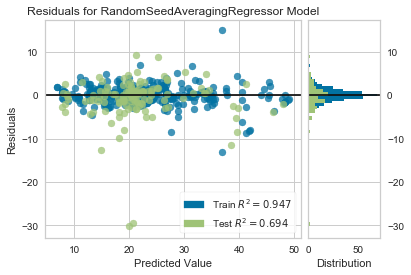

In [14]:
viz = ResidualsPlot(reg)

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof(outpath='residuals_plot.png')

In [15]:
dump(reg, 'regressor.pkl', compress=True)

['regressor.pkl']